In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 1. Dataset Preparation

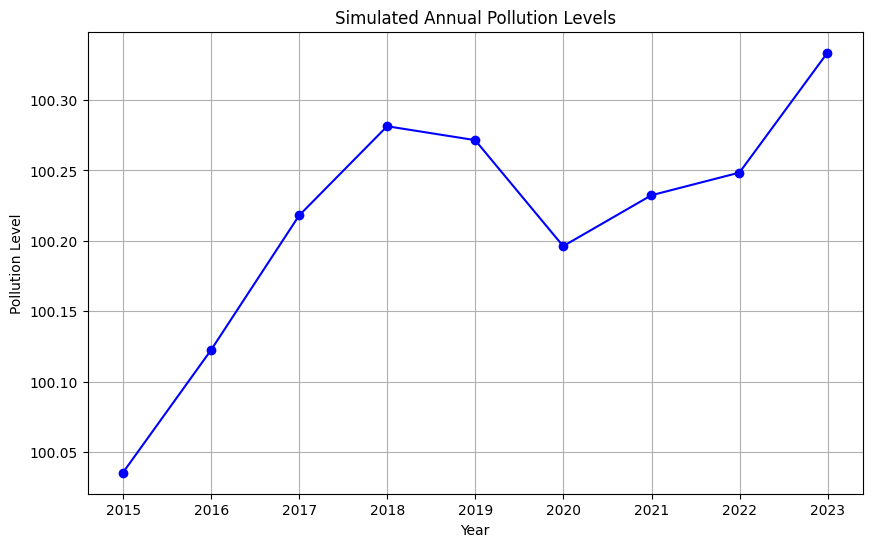

In [ ]:
data = pd.read_csv('/content/most-polluted-countries.csv')


# Task 1: Dataset Preparation
years = pd.date_range(start='2014', end='2023', freq='A')
trend = 0.05  # Trend component
seasonality = 0.1  # Seasonal component
noise = 0.02  # Random noise

np.random.seed(0)
pollution_levels = np.zeros(len(years))

for i in range(len(years)):
    pollution_levels[i] = 100 + trend*i + seasonality*np.sin(2*np.pi*i/len(years)) + np.random.normal(scale=noise)

data = pd.DataFrame({'Year': years, 'Pollution_Level': pollution_levels})
data.set_index('Year', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pollution_Level'], marker='o', color='b', linestyle='-')
plt.title('Simulated Annual Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.grid(True)
plt.show()

# 2. Stationarity Testing

In [ ]:
result = adfuller(data['Pollution_Level'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.129294249376781
p-value: 0.2328995205154385
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


# 3. ARIMA Model Identification

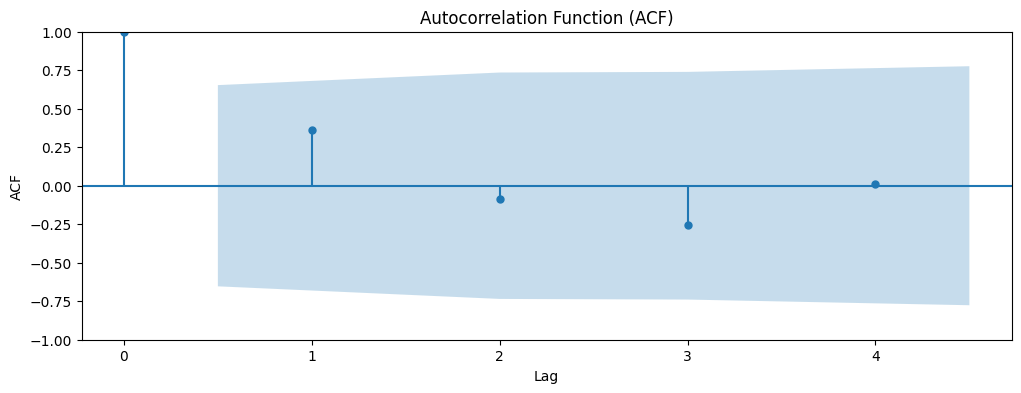

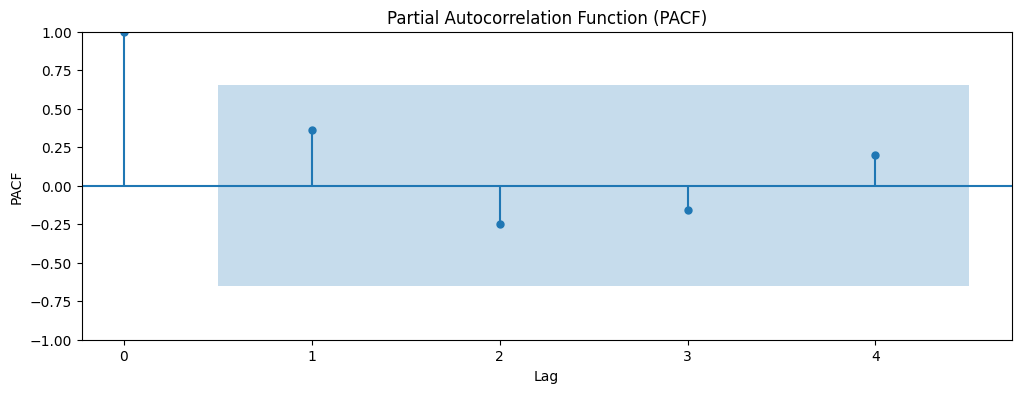

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(data['Pollution_Level'], ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(data['Pollution_Level'], ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


# 4. ARIMA Model Fitting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:        Pollution_Level   No. Observations:                    7
Model:                     AutoReg(1)   Log Likelihood                  11.413
Method:               Conditional MLE   S.D. of innovations              0.036
Date:                Wed, 27 Mar 2024   AIC                            -16.826
Time:                        07:31:04   BIC                            -17.450
Sample:                    12-31-2015   HQIC                           -19.327
                         - 12-31-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 55.3882     17.186      3.223      0.001      21.704      89.073
Pollution_Level.L1     0.4475      0.172      2.609      0.009       0.111       0.784
                    

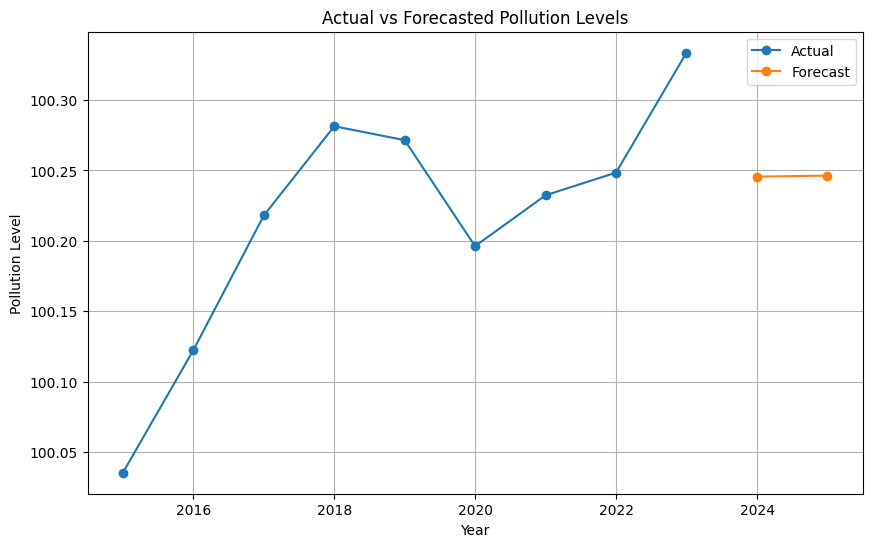

Actual values are not available for the forecast period.


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# We'll use the first 8 years of data for training
train_data = data.iloc[:-2]  # Exclude the last 2 years for forecasting

# Fit AR model
ar_model = AutoReg(train_data['Pollution_Level'], lags=1)  # AR(1) model
ar_result = ar_model.fit()

# Print model summary
print(ar_result.summary())

# Forecasting
# Forecast pollution levels for the next 2 years (2023-2024)
# Forecast pollution levels for the next 2 years (2023-2024)
forecast_steps = 2
forecast = ar_result.predict(start='2023', end='2024')

# Ensure forecast and actual values are aligned
forecast = forecast.loc['2023':'2024']

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pollution_Level'], label='Actual', marker='o')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Actual vs Forecasted Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

# Ensure actual values are available for the forecast period
actual_values = data['Pollution_Level'].loc['2023':'2024']

# Check if actual values are available
if len(actual_values) == 0:
    print("Actual values are not available for the forecast period.")
else:
    # Ensure forecast and actual values are aligned and have the same length
    forecast = forecast[:len(actual_values)]

    # Calculate Mean Squared Error (MSE) for the forecast
    mse = mean_squared_error(actual_values, forecast)
    print("Mean Squared Error (MSE) for the forecast:", mse)




In [ ]:
# Forecasting for the next 2 years with confidence interval
forecast_steps = 2
forecast = arima_result.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot actual data and forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pollution_Level'], label='Actual', marker='o')
plt.plot(pd.date_range(start='2023', periods=forecast_steps, freq='A'), forecast_values, label='Forecast', marker='o', color='orange')
plt.fill_between(pd.date_range(start='2023', periods=forecast_steps, freq='A'), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Actual vs Forecasted Pollution Levels with Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()